In [2]:
import cv2
import numpy as np
import pandas as pd
from scipy import signal
from sklearn.cluster import KMeans
from wmi import WMI
import logging
import matplotlib.pyplot as plt
from playsound import playsound



openimage


findThreshold
Remove small noise points
watershed
shapeFactorAndArea has kmeans


c:\Users\ankoj\miniconda3\envs\bhanu\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


shapeFactorAndArea has kmeans


c:\Users\ankoj\miniconda3\envs\bhanu\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation
watershed
watershed
segmentation_next
segmentation_next
segmentation_next
segmentation_next
segmentation_next
segmentation_next
watershed
Processing of outlier kernels after segmentation (unsplit)
segmentation_next
process_overseg
process_overseg
1914
segmentation_next
segmentation_next
2005
2019



    Error 259 for command:
        play icon/sound.mp3 wait
    The driver cannot recognize the specified command parameter.

    Error 263 for command:
        close icon/sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: icon/sound.mp3


PlaysoundException: 
    Error 259 for command:
        play icon/sound.mp3 wait
    The driver cannot recognize the specified command parameter.

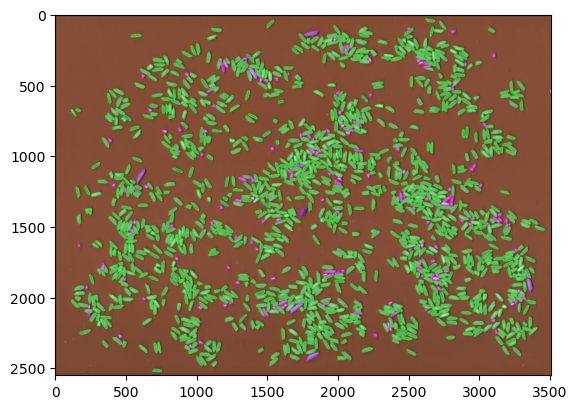

In [3]:
class GrainSegment:
    def __init__(self) -> None:
        #initlilise default parameters
        self.contours_add = []
        self.contours_normal = []
        self.contours_abnormal = []
        self.contours_remove = []
        self.contours_remove_normal_copy = []
        self.contours_remove_abnormal = []
        self.contours_remove_abnormal_copy= []
        self.contours_remove_normal = []
        self.line_manual = []

        self.list_balance_State = []
        self.list_light_State = []

        self.num_process = 0
        self.num_contours = 0
        self.meanArea = 0
        self.meanPerimeter = 0
        self.meanLength = 0
        self.meanWidth = 0
        self.shortEdge = 0

        self.trigger_zoom = 0
        self.mouse_mv_x = ""
        self.mouse_mv_y = ""
        self.labelx = 0
        self.labely = 0

        self.ratio = arearatio
        self.area_calibration_true = 0
        self.mouseButton = 0

        self.mouseButton = 0
        try:
            with open("model.txt", "r") as f:
                self.grainModel = int(f.readline().strip("\n"))
        except:
            self.grainModel = 0


        
    def openimage(self,imagename):
        print('openimage')
        self.imageName = imagename
        self.image_open =  cv2.imread(self.imageName, )
        self.image_color = self.image_open.copy()

        self.image_open_display = self.image_open.copy()
        #self.image_open_display = cv2.resize(self.image_open_display, (self.image_width, self.image_height))
    
    def process_overseg(self, binary_seg, way):
        # 分割后异常值籽粒（过分割）处理
        print('process_overseg')
        contours_error, _, list_ratioArea_error, list_grainArea_error = self.findratioarea(binary_seg)
        binary_seg_Error = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)
        binary_seg_Right = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)

        for i in range(len(contours_error)):
            if list_ratioArea_error[i] >= 0.80 and list_grainArea_error[i] >= 0.5 * np.mean(list_grainArea_error):
                cv2.drawContours(binary_seg_Right, [contours_error[i]], 0, 255, -1)
            else:
                cv2.drawContours(binary_seg_Error, [contours_error[i]], 0, 255, -1)

        binary_seg_Error_right = cv2.morphologyEx(binary_seg_Error, cv2.MORPH_CLOSE, self.kernel, iterations = 2)
        binary_seg = cv2.add(binary_seg_Right, binary_seg_Error_right)
        binary_seg = cv2.morphologyEx(binary_seg, cv2.MORPH_OPEN, self.kernel)

        contours_error, _, list_ratioArea, list_grainArea = self.findratioarea(binary_seg)
        binary_seg_Error = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)
        if np.mean(list_grainArea) >= 600:
            if way== 0:
                for i in range(len(contours_error)):
                    if list_grainArea[i] <= 0.4 * np.mean(list_grainArea):
                        cv2.drawContours(binary_seg_Error, [contours_error[i]], 0, 255, -1)
            if way == 1:
                for i in range(len(contours_error)):
                    if list_grainArea[i] <= 0.5 * np.mean(list_grainArea):
                        cv2.drawContours(binary_seg_Error, [contours_error[i]], 0, 255, -1)

            contours_error, _ = cv2.findContours(binary_seg_Error, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if len(contours_error) != 0:
                try:
                    list_center_seg = []
                    contours_seg, _ = cv2.findContours(binary_seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                    for c in contours_seg:
                        try:
                            M = cv2.moments(c)
                            center_X = int(M["m10"] / M["m00"])
                            center_Y = int(M["m01"] / M["m00"])
                        except:
                            center_X = c[0][0][0]
                            center_Y = c[0][0][1]
                        list_center_seg.append([center_X, center_Y])

                    binary_seg_ERROR_right = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)
                    for c in range(len(contours_error)):
                        list_distance = []
                        binary_seg_SELF = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)
                        cv2.drawContours(binary_seg_SELF, [contours_error[c]], 0, 255, -1)

                        M = cv2.moments(contours_error[c])
                        center_X = int(M["m10"] / M["m00"])
                        center_Y = int(M["m01"] / M["m00"])

                        for i in range(len(list_center_seg)):
                            distance = (center_X - list_center_seg[i][0]) ** 2 + (center_Y - list_center_seg[i][1]) ** 2
                            list_distance.append(distance)
                            list_distance_copy = list_distance.copy()
                            list_distance_copy.sort()

                        if list_distance_copy[1] <= 10000:
                            list_threeContours_mindistance = []
                            list_threeContours_mindistance.append(list_distance.index(list_distance_copy[1]))
                            list_threeContours_mindistance.append(list_distance.index(list_distance_copy[2]))
                            list_threeContours_mindistance.append(list_distance.index(list_distance_copy[3]))

                            list_ratioArea_overSeg = []
                            list_grainArea_overSeg = []
                            list_binary_seg_ERROR = []
                            for j in list_threeContours_mindistance:
                                binary_seg_ERROR = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)
                                cv2.drawContours(binary_seg_ERROR, [contours_seg[j]], 0, 255, -1)
                                binary_seg_ERROR = cv2.add(binary_seg_ERROR, binary_seg_SELF)

                                contours_ERROR, _ = cv2.findContours(binary_seg_ERROR, cv2.RETR_EXTERNAL,
                                                                     cv2.CHAIN_APPROX_SIMPLE)
                                center_1 = (contours_ERROR[0][0][0][0], contours_ERROR[0][0][0][1])
                                center_2 = (contours_ERROR[1][0][0][0], contours_ERROR[1][0][0][1])
                                cv2.line(binary_seg_ERROR, center_1, center_2, 255, 1)

                                contours_dilate, _, list_ratioArea_dilate, list_grainArea_dilate = self.findratioarea(
                                    binary_seg_ERROR)
                                list_ratioArea_overSeg.append(list_ratioArea_dilate[0])
                                list_grainArea_overSeg.append(list_grainArea_dilate[0])
                                list_binary_seg_ERROR.append(binary_seg_ERROR)

                            list_grainArea_OverSeg = []
                            list_ratioArea_OverSeg = []
                            list_binary_SEG_ERROR = []
                            for index in range(len(list_grainArea_overSeg)):
                                if way == 0:
                                    if list_grainArea_overSeg[index] <= 1.3 * self.area_checkshape:
                                        list_grainArea_OverSeg.append(list_grainArea_overSeg[index])
                                        list_ratioArea_OverSeg.append(list_ratioArea_overSeg[index])
                                        list_binary_SEG_ERROR.append(list_binary_seg_ERROR[index])
                                else:
                                    if list_grainArea_overSeg[index] <= 2 * self.area_checkshape:
                                        list_grainArea_OverSeg.append(list_grainArea_overSeg[index])
                                        list_ratioArea_OverSeg.append(list_ratioArea_overSeg[index])
                                        list_binary_SEG_ERROR.append(list_binary_seg_ERROR[index])

                            if len(list_grainArea_OverSeg) != 0:
                                if self.shapeFactor_checkshape >=0.75:
                                    if max(list_ratioArea_OverSeg) >= 0.85:
                                        binary_seg_ERROR_right = cv2.add(binary_seg_ERROR_right, list_binary_SEG_ERROR[
                                            list_ratioArea_OverSeg.index(max(list_ratioArea_OverSeg))])
                                    else:
                                        pass
                                else:
                                    if max(list_ratioArea_OverSeg) >= 0.75:
                                        binary_seg_ERROR_right = cv2.add(binary_seg_ERROR_right, list_binary_SEG_ERROR[
                                            list_ratioArea_OverSeg.index(max(list_ratioArea_OverSeg))])
                                    else:
                                        pass
                            else:
                                pass
                        else:
                            pass
                    binary_seg = cv2.bitwise_or(binary_seg, binary_seg_ERROR_right)
                except:
                    pass
            else:
                pass
        else:
            pass

        return binary_seg

  
  
  
    def segmentation_next(self, binary_adhesion, contours_adhesion):
        print('segmentation_next')
        binary_adhesion_next = np.zeros((binary_adhesion.shape[0], binary_adhesion.shape[1]), np.uint8)
        for i in range(0, len(contours_adhesion)):
            binary_adhesion_Single = np.zeros((binary_adhesion.shape[0], binary_adhesion.shape[1]), np.uint8)
            cv2.drawContours(binary_adhesion_Single, [contours_adhesion[i]], 0, 255, -1)
            binary_adhesion_Single = cv2.bitwise_and(binary_adhesion, binary_adhesion_Single)

            contours, _ = cv2.findContours(binary_adhesion_Single, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            x_cut, y_cut, w_cut, h_cut = cv2.boundingRect(contours[0])

            w_Cut, h_Cut = w_cut + 10, h_cut + 10
            if y_cut < 10:
                y_cut = 10
            if y_cut > binary_adhesion_Single.shape[0] - h_Cut:
                y_cut = binary_adhesion_Single.shape[0] - h_Cut
            if x_cut < 10:
                x_cut = 10
            if x_cut > binary_adhesion_Single.shape[1] - w_Cut:
                x_cut = binary_adhesion_Single.shape[1] - w_Cut
            binary_adhesion_single = binary_adhesion_Single[y_cut - 10: y_cut + h_Cut, x_cut - 10: x_cut + w_Cut]

            dst_cornerHarris = cv2.cornerHarris(binary_adhesion_single, 2, 23, 0.02)
            binary_adhesion_line = binary_adhesion_single.copy()
            binary_adhesion_line[dst_cornerHarris > 1e-13 * dst_cornerHarris.max()] = 255
            binary_adhesion_segline = cv2.subtract(binary_adhesion_line, binary_adhesion_single)
            num_linepixel = len(binary_adhesion_segline[binary_adhesion_segline == 255])
            binary_adhesion_segline = cv2.dilate(binary_adhesion_segline, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))

            if num_linepixel >= 25:
                lines = cv2.HoughLinesP(binary_adhesion_segline, 2, np.pi / 180, 25, minLineLength = 10, maxLineGap = 30)
            else:
                lines = cv2.HoughLinesP(binary_adhesion_segline, 2, np.pi / 180, 15, minLineLength = 8, maxLineGap = 30)

            if lines is None:
                binary_adhesion_next = cv2.add(binary_adhesion_next, binary_adhesion_Single)
            else:

                binary_adhesion_Line = cv2.cvtColor(binary_adhesion_line, cv2.COLOR_GRAY2BGR)
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    cv2.line(binary_adhesion_Line, (x1, y1), (x2, y2), (0, 255, 0), 1)

                for line in lines:
                    x1_reference, y1_reference, x2_reference, y2_reference = line[0]
                    distance = ((x1_reference - x2_reference) ** 2 + (y1_reference - y2_reference) ** 2) ** 0.5
                    if distance <= 100:
                        break

                list_x1 = []
                list_x2 = []
                list_y1 = []
                list_y2 = []
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    if abs(x1 - x1_reference) < 10 and abs(y1 - y1_reference) < 10 and abs(
                            x2 - x2_reference) < 10 and abs(y2 - y2_reference) < 10:
                        list_x1.append(x1)
                        list_x2.append(x2)
                        list_y1.append(y1)
                        list_y2.append(y2)

                x1_line = int(np.mean(list_x1))
                y1_line = int(np.mean(list_y1))
                x2_line = int(np.mean(list_x2))
                y2_line = int(np.mean(list_y2))

                binary_adhesion_SINGLE= cv2.cvtColor(binary_adhesion_single, cv2.COLOR_GRAY2BGR)
                cv2.line(binary_adhesion_SINGLE, (x1_line, y1_line), (x2_line, y2_line), (0, 255, 0), 2)

                if x2_line == x1_line:
                    x2_line = x1_line + 1

                k = (y2_line - y1_line) / (x2_line - x1_line)
                b = (x1_line * y2_line - x2_line * y1_line) / (x1_line - x2_line)
                w_cut = w_cut + 10
                h_cut = h_cut + 10
                if abs(k) <= 1:
                    if (x1_line - x2_line) < 0:
                        if self.shapeFactor_checkshape <= 0.75:
                            i, j = 2, 2
                        else:
                            i, j = 5, 5

                        while x1_line - i > 10 and int(k * (x1_line - i) + b) > 10 and x1_line - i < w_cut and int(
                                k * (x1_line - i) + b) < h_cut and binary_adhesion_single[
                            int(k * (x1_line - i) + b), x1_line - i].tolist() == 255:
                            binary_adhesion_single[int(k * (x1_line - i) + b), x1_line - i] = 0
                            i += 1

                        while x2_line + j > 10 and int(k * (x2_line + j) + b) > 10 and x2_line + j < w_cut and int(
                                k * (x2_line + j) + b) < h_cut and binary_adhesion_single[
                            int(k * (x2_line + j) + b), x2_line + j].tolist() == 255:
                            binary_adhesion_single[int(k * (x2_line + j) + b), x2_line + j] = 0
                            j += 1

                        x1_seg = x1_line - i
                        y1_seg = int(k * (x1_line - i) + b)
                        x2_seg = x2_line + j
                        y2_seg = int(k * (x2_line + j) + b)

                    else:
                        if self.shapeFactor_checkshape <= 0.75:
                            i, j = 2, 2
                        else:
                            i, j = 5, 5

                        while x1_line + i > 10 and int(k * (x1_line + i) + b) > 10 and x1_line + i < w_cut and int(
                                k * (x1_line + i) + b) < h_cut and binary_adhesion_single[
                            int(k * (x1_line + i) + b), x1_line + i].tolist() == 255:
                            binary_adhesion_single[int(k * (x1_line + i) + b), x1_line + i] = 0
                            i += 1
                        while x2_line - j > 10 and int(k * (x2_line - j) + b) > 10 and x2_line - j < w_cut and int(
                                k * (x2_line - j) + b) < h_cut and binary_adhesion_single[
                            int(k * (x2_line - j) + b), x2_line - j].tolist() == 255:
                            binary_adhesion_single[int(k * (x2_line - j) + b), x2_line - j] = 0
                            j += 1

                        x1_seg = x1_line + i
                        y1_seg = int(k * (x1_line + i) + b)
                        x2_seg = x2_line - j
                        y2_seg = int(k * (x2_line - j) + b)

                else:
                    if (y1_line - y2_line) < 0:
                        if self.shapeFactor_checkshape <= 0.75:
                            i, j = 2, 2
                        else:
                            i, j = 5, 5

                        while int((y1_line - i - b) / k) > 10 and y1_line - i > 10 and int(
                                (y1_line - i - b) / k) < w_cut and y1_line - i < h_cut and binary_adhesion_single[
                            y1_line - i, int((y1_line - i - b) / k)].tolist() == 255:
                            binary_adhesion_single[y1_line - i, int((y1_line - i - b) / k)] = 0
                            i += 1
                        while int((y2_line + j - b) / k) > 10 and y2_line + j > 10 and int(
                                (y2_line + j - b) / k) < w_cut and y2_line + j < h_cut and binary_adhesion_single[
                            y2_line + j, int((y2_line + j - b) / k)].tolist() == 255:
                            binary_adhesion_single[y2_line + j, int((y2_line + j - b) / k)] = 0
                            j += 1

                        x1_seg = int((y1_line - i - b) / k)
                        y1_seg = y1_line - i
                        x2_seg = int((y2_line + j - b) / k)
                        y2_seg = y2_line + j

                    else:
                        if self.shapeFactor_checkshape <= 0.75:
                            i, j = 2, 2
                        else:
                            i, j = 5, 5

                        while int((y1_line + i - b) / k) > 10 and y1_line + i > 10 and int(
                                (y1_line + i - b) / k) < w_cut and y1_line + i < h_cut and binary_adhesion_single[
                            y1_line + i, int((y1_line + i - b) / k)].tolist() == 255:
                            binary_adhesion_single[y1_line + i, int((y1_line + i - b) / k)] = 0
                            i += 1
                        while int((y2_line - j - b) / k) > 10 and y2_line - j > 10 and int(
                                (y2_line - j - b) / k) < w_cut and y2_line - j < h_cut and binary_adhesion_single[
                            y2_line - j, int((y2_line - j - b) / k)].tolist() == 255:
                            binary_adhesion_single[y2_line - j, int((y2_line - j - b) / k)] = 0
                            j += 1

                        x1_seg = int((y1_line + i - b) / k)
                        y1_seg = y1_line + i
                        x2_seg = int((y2_line - j - b) / k)
                        y2_seg = y2_line - j

                x1_seg = x1_seg + x_cut - 10
                y1_seg = y1_seg + y_cut - 10
                x2_seg = x2_seg + x_cut - 10
                y2_seg = y2_seg + y_cut - 10

                # binary_adhesion_Single= cv2.cvtColor(binary_adhesion_Single, cv2.COLOR_GRAY2BGR)
                # cv2.line(binary_adhesion_Single, (x1_seg, y1_seg), (x2_seg, y2_seg), (0, 255, 0), 2)
                # binary_adhesion_Single = cv2.cvtColor(binary_adhesion_Single, cv2.COLOR_BGR2GRAY)
                cv2.line(binary_adhesion_Single, (x1_seg, y1_seg), (x2_seg, y2_seg), 0, 2)
                binary_adhesion_next = cv2.add(binary_adhesion_next, binary_adhesion_Single)

        return binary_adhesion_next


    
    def segmentation(self, binary, factor_distance_1, factor_distance_2, ratioarea, factor):
        print('segmentation')
        binary_seg = np.zeros(binary.shape, dtype=np.uint8)
        for i in (factor_distance_1, factor_distance_2):
            binary_seg_watershed = self.watershed(binary, i / 10)
            kernel_watersged = cv2.getStructuringElement(cv2.MORPH_RECT, (factor, factor))
            binary_seg_watershed = cv2.morphologyEx(binary_seg_watershed, cv2.MORPH_OPEN, kernel_watersged, iterations=2)
            binary_seg_watershed = cv2.erode(binary_seg_watershed, self.kernel)

            contours, _, list_ratioArea, list_grainArea = self.findratioarea(binary_seg_watershed)
            binary_adhesion_watershed = binary_seg_watershed.copy()
            binary_single_watershed = binary_seg_watershed.copy()

            if self.area_checkshape >= 1000:
                for i in range(len(contours)):
                    if list_ratioArea[i]:
                        if list_ratioArea[i] <= ratioarea or list_grainArea[i] >= 1.4 * np.mean(list_grainArea):
                            cv2.drawContours(binary_single_watershed, [contours[i]], 0, 0, -1)
                        else:
                            cv2.drawContours(binary_adhesion_watershed, [contours[i]], 0, 0, -1)
                    else:
                        pass
            else:
                for i in range(len(contours)):
                    if list_ratioArea[i]:
                        if list_ratioArea[i] <= ratioarea and list_grainArea[i] >= 1.4 * np.mean(list_grainArea):
                            cv2.drawContours(binary_single_watershed, [contours[i]], 0, 0, -1)
                        else:
                            cv2.drawContours(binary_adhesion_watershed, [contours[i]], 0, 0, -1)
                    else:
                        pass
            
            #showimg(binary_adhesion_watershed)
            

            binary = cv2.dilate(binary_adhesion_watershed, self.kernel)
            binary_seg = cv2.add(binary_single_watershed, binary_seg)

        return binary_seg, binary_adhesion_watershed

    def shapeFactorAndArea(self, list, way):
        print('shapeFactorAndArea has kmeans')
        list.sort()
        for i in range(len(list)):
            list[i] = round(list[i], 2)

        if len(list) >= 3:
            kmeans = KMeans(n_clusters = 3)
        elif len(list) == 2:
            kmeans = KMeans(n_clusters= 2 )
        else:
            kmeans = KMeans(n_clusters= 1 )

        list_reshape = np.array(list).reshape(-1, 1)
        kmeans.fit(list_reshape)
        list_single = []

        if way == 0:
            for i in range(len(list)):
                if kmeans.labels_[i] == kmeans.labels_[-1]:
                    list_single.append(list[i])
        else:
            for i in range(len(list)):
                if kmeans.labels_[i] == kmeans.labels_[0]:
                    list_single.append(list[i])

        return np.mean(list_single)

    def findratioarea(self, binary):
        # Find adhesion areas based on area ratio
        #print('findratioarea')
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        list_grainArea = []
        list_convexArea = []
        list_ratioArea = []

        for i in range(len(contours)):
            grainArea = cv2.contourArea(contours[i])
            list_grainArea.append(grainArea)
            hull = cv2.convexHull(contours[i])
            convexArea = cv2.contourArea(hull)
            list_convexArea.append(convexArea)

        for i in range(len(contours)):
            if list_convexArea[i] != 0:
                ratioArea = list_grainArea[i] / list_convexArea[i]
            else:
                ratioArea = 0
            list_ratioArea.append(ratioArea)
        return contours, hierarchy, list_ratioArea, list_grainArea

    def watershed(self, binary, factor_distance):
        print('watershed')
        binary_BGR = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
        dist_watershed = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
        ret, foreground = cv2.threshold(dist_watershed, dist_watershed.max() * factor_distance, 255, cv2.THRESH_BINARY)
        foreground = np.uint8(foreground)
        kernel_foreground = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        foreground = cv2.morphologyEx(foreground, cv2.MORPH_OPEN, kernel_foreground)
        unknown = cv2.subtract(binary, foreground)
        _, labels = cv2.connectedComponents(foreground)
        labels = labels + 1
        labels[unknown == 255] = 0
        labels = cv2.watershed(binary_BGR, labels)
        binary[labels == -1] = 0
        return binary
    def findThreshold(self, binary):
        print('findThreshold')
        array_1D = binary.ravel()
        se = pd.Series(array_1D)
        grayvalue_counts = dict(se.value_counts(sort=False))

        for k in list(grayvalue_counts.keys()):
            if grayvalue_counts[k] <= 1000:
                del grayvalue_counts[k]

        grayvalue = list(grayvalue_counts.keys())
        counts = list(grayvalue_counts.values())

        counts_normal = []
        for i in range(len(counts)):
            Max = max(counts)
            Min = min(counts)
            counts_normal.append((counts[i] - Min) / (Max - Min))

        counts_sup = [0 for _ in range(256)]
        for i in range(0, 256):
            for j in range(0, len(grayvalue)):
                if grayvalue[j] == i:
                    counts_sup[i] = counts_normal[j]

        peakindex = signal.find_peaks_cwt(counts_sup, (15, 15))
        if len(peakindex) >= 2:
            thre_left = peakindex[0]
            peakindex_different = []
            for i in range(0, len(peakindex)):
                peakindex_different.append(abs(peakindex[i] - 200))
            thre_right = peakindex[peakindex_different.index(min(peakindex_different))]
            num_0_middle = counts_sup[thre_left:thre_right].count(0)

            list_0_middle = []
            if num_0_middle != 0:
                for i in range(thre_left, thre_right):
                    if counts_sup[i] == 0:
                        list_0_middle.append(i)
                thre = int((list_0_middle[0] + 1.6 * list_0_middle[-1]) / 3)
            else:
                thre = 55
        else:
            thre = 55

        return thre
    def findshapefactor(self, binary):
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        list_grainarea = []
        list_grainArea = []
        list_grainPerimeter = []
        list_shapeFactor = []
        list_longEdge = []
        list_shortEdge = []

        for i in range(len(contours)):
            grainArea = cv2.contourArea(contours[i])
            grainPerimeter = cv2.arcLength(contours[i], True)
            list_grainarea.append(grainArea)
            list_grainArea.append(4 * 3.141592653 * grainArea)
            list_grainPerimeter.append(grainPerimeter ** 2)

            rect = cv2.minAreaRect(contours[i])
            if rect[1][0] >= rect [1][1]:
                list_longEdge.append(rect[1][0])
                list_shortEdge.append(rect[1][1])

            else:
                list_longEdge.append(rect[1][1])
                list_shortEdge.append(rect[1][0])

        longEdge = np.mean(list_longEdge)

        if list_shortEdge == []:
            shortEdge = 40
        else:
            shortEdge = np.mean(list_shortEdge)

        for i in range(len(contours)):
            try:
                shapeFactor = list_grainArea[i] / list_grainPerimeter[i]
                list_shapeFactor.append(shapeFactor)
            except:
                list_shapeFactor.append(0)

        return contours, list_shapeFactor, list_grainarea, longEdge, shortEdge
    
    def processing(self):
        self.widthRatio = -1
        self.heightRatio = -1


            
        try:
            self.kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
            channel_B=cv2.imread(self.imageName, cv2.IMREAD_GRAYSCALE)
            _, binary_background = cv2.threshold(channel_B, 100, 255, cv2.THRESH_BINARY_INV)
            

            thre = self.findThreshold(channel_B)
            
            area_max = 0 
            contours, _ = cv2.findContours(binary_background, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
            for i in range(1, len(contours)):
                area = cv2.contourArea(contours[i])
                if  area >= area_max:
                    area_max = area
            if area_max <= 6000000 * self.widthRatio * self.heightRatio:
                _, binary = cv2.threshold(channel_B, thre, 255, cv2.THRESH_BINARY_INV)
            else:
                _, binary = cv2.threshold(channel_B, thre, 255, cv2.THRESH_BINARY)
        
            # Remove small noise points
            print('Remove small noise points')
            contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for i in range(len(contours)):
                area = cv2.contourArea(contours[i])
                if area <= 50:
                    cv2.drawContours(binary, [contours[i]], -1, 0, -1)
            if self.grainModel ==0:
                binary_seg_shape = binary.copy()
                binary_seg_shape = self.watershed(binary_seg_shape, 0.3)
                binary_seg_shape = cv2.morphologyEx(binary_seg_shape, cv2.MORPH_OPEN, self.kernel, iterations=2)
                binary_seg_shape = cv2.erode(binary_seg_shape, self.kernel)

                contours_shape, _, _, list_grainArea_shape = self.findratioarea(binary_seg_shape )
                if len(list_grainArea_shape) != 0:
                    for i in range(len(list_grainArea_shape)):
                        if list_grainArea_shape[i] <= 0.1 * np.mean(list_grainArea_shape):
                            cv2.drawContours(binary_seg_shape, [contours_shape[i]], 0, 0, -1)
                
                _, list_shapeFactor_checkshape, list_grainArea, self.longEdge, self.shortEdge = self.findshapefactor(binary_seg_shape)
                self.shapeFactor_checkshape = self.shapeFactorAndArea(list_shapeFactor_checkshape,0)
                self.area_checkshape = self.shapeFactorAndArea(list_grainArea,1)
                
                if self.shapeFactor_checkshape <= 0.7:
                    self.binary_erode = cv2.erode(binary, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)))
                else:
                    self.binary_erode = binary


                binary_single = self.binary_erode.copy()
                contours, _,list_ratioArea, list_grainArea = self.findratioarea(self.binary_erode)
                if len(list_ratioArea) != 0:
                    for i in range(len(list_ratioArea)):
                        if list_ratioArea[i] <= 0.95 and list_grainArea[i] >= 1.2 * self.area_checkshape:
                            cv2.drawContours(binary_single, [contours[i]], 0, 0, -1)
                
                binary_adhesion_first = cv2.bitwise_xor(self.binary_erode, binary_single)
                contours, hierarchy = cv2.findContours(binary_adhesion_first, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
                
                if len(contours)!=0:
                    if self.shapeFactor_checkshape >= 0.75:
                        if self.area_checkshape >= 600:
                            binary_seg, binary_adhesion = self.segmentation(binary_adhesion_first, 4, 5, 0.92, 7)
                        else:
                            binary_seg, binary_adhesion = self.segmentation(binary_adhesion_first, 5.5, 6, 0.92, 3)

                    elif self.shapeFactor_checkshape >= 0.675 and self.shapeFactor_checkshape < 0.75:
                        if self.area_checkshape >= 600:
                            binary_seg, binary_adhesion = self.segmentation(binary_adhesion_first, 2, 4, 0.92, 7)
                        else:
                            binary_seg, binary_adhesion = self.segmentation(binary_adhesion_first, 5.5, 6, 0.92, 3)
                    else:
                        if self.area_checkshape >= 600:
                            binary_seg, binary_adhesion = self.segmentation(binary_adhesion_first, 2, 3, 0.91, 5)
                        else:
                            binary_seg, binary_adhesion = self.segmentation(binary_adhesion_first, 5.5, 6, 0.92, 3)
                    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
                    binary_adhesion = cv2.dilate(binary_adhesion, kernel_dilate)
                    value_adhesion = 1
                    list_binary_adhesion = []
                    while (value_adhesion == 1):
                        contours_adhesion, _ = cv2.findContours(binary_adhesion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                        if len(contours_adhesion) > 0:
                            binary_adhesion = self.segmentation_next(binary_adhesion, contours_adhesion)
                            binary_adhesion = cv2.morphologyEx(binary_adhesion, cv2.MORPH_OPEN, kernel_dilate)

                            contours, _, _, list_grainarea = self.findratioarea(binary_adhesion)
                            binary_adhesion_single = binary_adhesion.copy()
                            for i in range(len(contours)):
                                if list_grainarea[i] >= 1.1 * np.mean(list_grainarea):
                                    cv2.drawContours(binary_adhesion_single, [contours[i]], 0, 0, -1)
                                else:
                                    cv2.drawContours(binary_adhesion, [contours[i]], 0, 0, -1)
                                    list_binary_adhesion.append(binary_adhesion)

                            binary_seg = cv2.add(binary_seg, binary_adhesion_single)

                        else:
                            value_adhesion = 0
                    try:
                        binary_adhesion_last = list_binary_adhesion[-2]
                        binary_seg = cv2.subtract(binary_seg, binary_adhesion_last)
                        binary_adhesion_last = self.watershed(binary_adhesion_last, 0.8)
                        binary_adhesion_last = cv2.morphologyEx(binary_adhesion_last, cv2.MORPH_OPEN, self.kernel, iterations=2)
                        binary_adhesion_last = cv2.erode(binary_adhesion_last, self.kernel)
                        binary_seg = cv2.add(binary_seg, binary_adhesion_last)

                    except:
                        pass

                    binary_single = cv2.morphologyEx(binary_single, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)))
                    binary_seg = cv2.add(binary_single, binary_seg)


                    
                else:
                    binary_seg = binary_single

                
                # Processing of outlier kernels after segmentation (unsplit)
                print('Processing of outlier kernels after segmentation (unsplit)')
                binary_seg = cv2.morphologyEx(binary_seg, cv2.MORPH_OPEN, self.kernel)
                binary_seg_error = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)
                
                contours, _,list_ratioarea, list_grainarea = self.findratioarea(binary_seg)
                for i in range(len(list_ratioarea)):
                    if (1 - list_ratioarea[i]) * list_grainarea[i] >= 0.1 * self.area_checkshape:
                        cv2.drawContours(binary_seg_error, [contours[i]], 0, 255, -1)

                binary_seg_correct = cv2.subtract(binary_seg, binary_seg_error)
                contours_adhesion, _ = cv2.findContours(binary_seg_error, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if len(contours_adhesion) > 0:
                    binary_seg_error_single = self.segmentation_next(binary_seg_error, contours_adhesion)
                    binary_seg_error_single = cv2.morphologyEx(binary_seg_error_single, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=2)
                else:
                    binary_seg_error_single = np.zeros((binary_seg_error.shape[0], binary_seg_error.shape[1]), np.uint8)
                binary_seg = cv2.add(binary_seg_correct, binary_seg_error_single)

                binary_seg = self.process_overseg(binary_seg,0)

                binary_BGR = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
                unknown = cv2.subtract(binary, binary_seg)
                _, labels = cv2.connectedComponents(binary_seg)
                labels = labels + 1
                labels[unknown == 255] = 0
                labels = cv2.watershed(binary_BGR, labels)
                binary_watershed = binary.copy()
                binary_watershed[labels == -1] = 0
                kernel_Dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
                binary_seg = cv2.erode(binary_watershed, kernel_Dilate)


                binary_seg = self.process_overseg(binary_seg, 1)
                binary_seg= cv2.bitwise_and(binary, binary_seg)
                #showimg(binary_seg)
                num_noseg = 2
                print('1914')
                while num_noseg != 0:
                    binary_seg_error = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)
                    contours, _, list_ratioArea, list_grainarea = self.findratioarea(binary_seg)
                    for i in range(len(list_grainarea)):
                        if (list_ratioArea[i] <= 0.85 and list_grainarea[i] >= 1.2 * self.area_checkshape) or (list_ratioArea[i] <= 0.9 and list_grainarea[i] >= 1.8 * self.area_checkshape):
                            cv2.drawContours(binary_seg_error, [contours[i]], 0, 255, -1)
                    binary_seg_error = cv2.bitwise_and(binary_seg, binary_seg_error)

                    binary_seg_correct = cv2.subtract(binary_seg, binary_seg_error)
                    contours_adhesion, _ = cv2.findContours(binary_seg_error, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                    if len(contours_adhesion) > 0:
                        binary_seg_error_single = self.segmentation_next(binary_seg_error, contours_adhesion)
                        binary_seg_error_single = cv2.morphologyEx(binary_seg_error_single, cv2.MORPH_OPEN,
                                                                   cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)),
                                                                   iterations=2)
                    else:
                        binary_seg_error_single = np.zeros((binary_seg_error.shape[0], binary_seg_error.shape[1]), np.uint8)
                    binary_seg = cv2.add(binary_seg_correct, binary_seg_error_single)
                    num_noseg -= 1

                binary_seg_long_all = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)
                binary_seg_right = binary_seg.copy()
                contours_long, _, _, _ = self.findratioarea(binary_seg)
                for i in range(len(contours_long)):
                    rectangle = cv2.minAreaRect(contours_long[i])
                    side_X = rectangle[1][0]
                    side_Y = rectangle[1][1]
                    if side_X >= side_Y:
                        length_grain = side_X
                    else:
                        length_grain = side_Y

                    binary_seg_long = np.zeros((binary_seg.shape[0], binary_seg.shape[1]), np.uint8)
                    if length_grain >= 1.8 * self.longEdge:
                        cv2.drawContours(binary_seg_long, [contours_long[i]], -1, 255, -1)
                        binary_seg_long = cv2.bitwise_and(binary_seg, binary_seg_long)
                        binary_seg_right = cv2.subtract(binary_seg_right, binary_seg_long)
                        binary_seg_long_all = cv2.add(binary_seg_long_all, binary_seg_long)

                dist_transform = cv2.distanceTransform(binary_seg_long_all, 2, 5)
                _, binary_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
                binary_fg = np.uint8(binary_fg)
                unknown = cv2.subtract(binary_seg_long_all, binary_fg)
                ret, markers1 = cv2.connectedComponents(binary_fg)
                markers = markers1 + 1
                markers[unknown == 255] = 0
                binary_seg_long_BGR = cv2.cvtColor(binary_seg_long_all, cv2.COLOR_GRAY2BGR)
                markers = cv2.watershed(binary_seg_long_BGR, markers)
                binary_seg_long_all[markers == -1] = 0
                binary_seg_long_all = cv2.erode(binary_seg_long_all, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)))

                binary_seg = cv2.add(binary_seg_right, binary_seg_long_all)
                binary_BGR = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
                unknown = cv2.subtract(binary, binary_seg)
                _, labels = cv2.connectedComponents(binary_seg)
                labels = labels + 1
                labels[unknown == 255] = 0
                labels = cv2.watershed(binary_BGR, labels)
                binary_watershed = binary.copy()
                binary_watershed[labels == -1] = 0
                binary_seg = cv2.erode(binary_watershed, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)))

                binary_seg_remove = cv2.erode(binary_seg, self.kernel)
                _, _, list_grainArea_remove, _, _ = self.findshapefactor(binary_seg_remove)
                contours, _ = cv2.findContours(binary_seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                for i in range(len(contours)):
                    grainarea = cv2.contourArea(contours[i])
                    if grainarea <= 0.2 * np.mean(list_grainArea_remove):
                        cv2.drawContours(binary_seg, [contours[i]], -1, 0, -1)

                binary_loss = cv2.subtract(binary, binary_seg)
                binary_loss = cv2.morphologyEx(binary_loss, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
                binary_loss = cv2.morphologyEx(binary_loss, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
                contours_loss, _, list_ratioArea_loss, list_grainArea_loss = self.findratioarea(binary_loss)
                
                for i in range(len(contours_loss)):
                    grainarea = cv2.contourArea(contours_loss[i])
                    if grainarea <= 0.3 * self.area_checkshape:
                        cv2.drawContours(binary_loss, [contours_loss[i]], -1, 0, -1)
                contours_loss, _, list_ratioArea_loss, list_grainArea_loss = self.findratioarea(binary_loss)

                self.image_contour = self.image_color.copy()
                self.list_normal = []
                self.list_abnormal = []
                self.contours_final, _, self.list_ratioArea_final, self.list_grainArea_final = self.findratioarea(binary_seg)
                
                #print(2000,len(self.contours_final),len(self.list_ratioArea_final),len(self.list_grainArea_final))
                #print(type(binary_seg))
                #np.save('bin_seg',binary_seg)
                #print(type(self.contours_final),type(self.list_ratioArea_final),type(self.list_grainArea_final),len(contours_loss))
                self.contours_final = list(self.contours_final)
                for i in range(len(contours_loss)):
                    #print('bharath')
                    self.contours_final.append(contours_loss[i])
                    #print(type(self.contours_final),type(contours_loss[i]),)
                    #return
                    self.list_ratioArea_final.append(list_ratioArea_loss[i])
                    #print(2)
                    self.list_grainArea_final.append(list_grainArea_loss[i])
                self.contours_final = tuple(self.contours_final)
                print(2005)
                self.num_contours = len(self.contours_final)
                list_area_calibration_pixel = []
                for i in range(len(self.contours_final)):
                    area_calibration_Pixel = cv2.contourArea(self.contours_final[i])
                    list_area_calibration_pixel.append(area_calibration_Pixel)

                    if self.list_ratioArea_final[i] >= 0.85 and self.list_grainArea_final[i] <= 1.8 * np.mean(self.list_grainArea_final) \
                            and self.list_grainArea_final[i] >= 0.5 * np.mean(self.list_grainArea_final):
                        cv2.drawContours(self.image_contour, [self.contours_final[i]], -1, (0, 255, 0), 3)
                        self.list_normal.append(i)
                    else:
                        cv2.drawContours(self.image_contour, [self.contours_final[i]], -1, (255, 0, 255), 3)
                        self.list_abnormal.append(i)
                print(2019)
                if len(self.contours_final) == 1:
                    self.area_calibration_pixel = max(list_area_calibration_pixel)
                    self.area_calibration_true = self.area_calibration_pixel * self.ratio
                else:
                    self.area_calibration_pixel = 0
                    self.area_calibration_true = 0

                for i in self.list_normal:
                    self.contours_normal.append(self.contours_final[i])
                for i in self.list_abnormal:
                    self.contours_abnormal.append(self.contours_final[i])
                



                
            else:
                self.image_contour = self.image_color.copy()
                self.list_normal = []
                self.list_abnormal = []
                self.contours_final, _, _, _, self.shortEdge = self.findshapefactor(binary)
                self.num_contours = len(self.contours_final)

                list_area_calibration_pixel = []
                for i in range(len(self.contours_final)):
                    area_calibration_Pixel = cv2.contourArea(self.contours_final[i])
                    list_area_calibration_pixel.append(area_calibration_Pixel)
                    cv2.drawContours(self.image_contour, [self.contours_final[i]], -1, (0, 255, 0), 3)
                    self.list_normal.append(i)

                if len(self.contours_final) == 1:
                    self.area_calibration_pixel = max(list_area_calibration_pixel)
                    self.area_calibration_true = self.area_calibration_pixel * self.ratio
                else:
                    self.area_calibration_pixel = 0
                    self.area_calibration_true = 0

                for i in self.list_normal:
                    self.contours_normal.append(self.contours_final[i])
                for i in self.list_abnormal:
                    self.contours_abnormal.append(self.contours_final[i])
             
            self.image_count = self.image_contour


        except Exception as e:
            print(e)

            pass    
        try:
            # Obtain Seed Average Parameters
            self.list_area_singleGrain = []
            self.list_perimeter_singleGrain = []
            self.list_length_singleGrain = []
            self.list_width_singleGrain = []
            
            num_grain_normal = len(self.contours_normal)
            for c in range(num_grain_normal):
                area_singleGrain = cv2.contourArea(self.contours_normal[c])
                rectangle_singleGrain = cv2.minAreaRect(self.contours_normal[c])
                side_X = rectangle_singleGrain[1][0]
                side_Y = rectangle_singleGrain[1][1]
                if side_X >= side_Y:
                    length_singleGrain = side_X
                    width_singleGrain = side_Y
                else:
                    length_singleGrain = side_Y
                    width_singleGrain = side_X

                self.list_area_singleGrain.append(area_singleGrain)
                self.list_length_singleGrain.append(length_singleGrain)
                self.list_width_singleGrain.append(width_singleGrain)
            
            list_approx = []
            for c in range(num_grain_normal):
                epsilon = 0.005 * cv2.arcLength(self.contours_normal[c], True)
                approx = cv2.approxPolyDP(self.contours_normal[c], epsilon, True)
                list_approx.append(approx)

            for c in range(num_grain_normal):
                perimeter_singleGrain = cv2.arcLength(list_approx[c], True)
                self.list_perimeter_singleGrain.append(perimeter_singleGrain)

            totalArea = 0
            totalPerimeter = 0
            totalLength = 0
            totalWidth = 0
            for i in range(num_grain_normal):
                totalArea += self.list_area_singleGrain[i]
                totalPerimeter += self.list_perimeter_singleGrain[i]
                totalLength += self.list_length_singleGrain[i]
                totalWidth += self.list_width_singleGrain[i]

            try:
                self.meanArea = totalArea / len(self.contours_normal)
                self.meanPerimeter = totalPerimeter / len(self.contours_normal)
                self.meanLength = totalLength / len(self.contours_normal)
                self.meanWidth = totalWidth / len(self.contours_normal)

            except:
                self.meanArea = 0
                self.meanPerimeter = 0
                self.meanLength = 0
                self.meanWidth = 0

            self.meanArea = round(self.meanArea * self.ratio, 2)
            self.meanPerimeter = round(self.meanPerimeter * self.ratio ** 0.5, 2)
            self.meanLength = round(self.meanLength * self.ratio ** 0.5, 2)
            self.meanWidth = round(self.meanWidth * self.ratio ** 0.5, 2)
            self.menaRatioLW = round(self.meanLength / self.meanWidth, 2)
            self.menaED = round((self.meanArea / 3.1415926) ** 0.5 * 2, 2)
            self.meanShapeFactor = round((4 * 3.1415926 * self.meanArea) / self.meanPerimeter ** 2, 2)


           
        except:    

            self.meanArea = 0
            self.meanPerimeter = 0
            self.meanLength = 0
            self.meanWidth = 0
            self.menaRatioLW = 0
            self.menaED = 0
            self.meanShapeFactor = 0
        
        plt.imshow(self.image_count.data)
        playsound('icon/sound.mp3')
        ###save images



if __name__=='__main__':
    try:
        with open("arearatio.txt", "r") as f:
            arearatio = float(f.readline())
    except:
        arearatio = 6.732629815077101e-05
    indosaw = GrainSegment()
    indosaw.openimage('sample/1.Bmp')
    indosaw.processing()



In [25]:
img=cv2.imread(
    'sample/30194218.jpg'
)

In [26]:
print(img)

[[[171 177 182]
  [171 180 184]
  [173 182 185]
  ...
  [171 199 193]
  [175 201 195]
  [176 202 196]]

 [[163 169 174]
  [163 172 176]
  [163 175 177]
  ...
  [171 199 193]
  [174 200 194]
  [174 200 194]]

 [[155 163 170]
  [155 164 168]
  [154 166 168]
  ...
  [171 199 193]
  [173 199 193]
  [171 197 191]]

 ...

 [[121 142 133]
  [121 142 133]
  [120 141 132]
  ...
  [ 89 116 112]
  [ 87 116 113]
  [ 87 116 113]]

 [[121 143 131]
  [121 143 131]
  [121 143 131]
  ...
  [ 89 116 112]
  [ 87 116 113]
  [ 85 116 115]]

 [[121 144 130]
  [121 144 130]
  [121 143 131]
  ...
  [ 87 117 112]
  [ 87 115 115]
  [ 84 115 114]]]


In [10]:



class abcs:
    def __init__(self) -> None:
        self.a='bhanu'
        self.next(self.a)
        
    def next(self,vb):
        print(self.a,vb)
        #vb='ko'
        print(id(self.a),id(vb))
        print(self.a,vb)
        self.b= self.a + 'prakash'
    def prin(self) -> str:
        return self.b
            


In [11]:
a=abcs()
a.prin()

bhanu bhanu
2299320423984 2299320423984
bhanu bhanu


'bhanuprakash'

In [12]:
a= [1,2]
b=a
b[0] = 2
print(a,b)

[2, 2] [2, 2]
